In [112]:
import pandas as pd

In [3]:
df = pd.read_csv("products_data.csv",on_bad_lines='skip',sep='\t')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\3809983380.py:1: DtypeWarning: Columns (0,11,17,31,32,33,34,35,45,46,50,52,53,56,67,72) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("products_data.csv",on_bad_lines='skip',sep='\t')


In [4]:
df.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'last_modified_by',
       'last_updated_t', 'last_updated_datetime',
       ...
       'glycemic-index_100g', 'water-hardness_100g', 'choline_100g',
       'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g',
       'carnitine_100g', 'sulphate_100g', 'nitrate_100g', 'acidity_100g'],
      dtype='object', length=206)

In [13]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,ingredients_analysis_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutrition_data,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,nutrient_levels_tags,product_quantity,owner,data_quality_errors_tags,unique_scans_n,popularity_tags,completeness,last_image_t,last_image_datetime,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
0,00000000000000225,http://world-en.openfoodfacts.org/product/0000...,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,1692101569,2023-08-15T12:12:49Z,digg,1.707748e+09,2024-02-12T14:25:39Z,jeunes pousses,NaN,NaN,NaN,NaN,NaN,NaN,NaN,endives,endives,"Aliments et boissons à base de végétaux, Alime...","en:plant-based-foods-and-beverages,en:plant-ba...","Plant-based foods and beverages,Plant-based fo...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:france,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,Fruits and vegetables,Vegetables,en:vegetables,"en:fruits-and-vegetables,en:vegetables

In [6]:
pd.set_option('display.max_columns', None)

In [12]:
df.shape

(3417655, 206)

Total Number of qualified products with images

In [17]:
df_qualified = df[~(df['image_nutrition_url'].isna())]

In [19]:
len(df_qualified)

1828041

The effective number of images that have the nutrition content is thus reduced from 3.1 Million to 1.8 Million Products. These are the total number of products that need to be considered for modeling purpose

In [20]:
df_qualified.head()


,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,ingredients_analysis_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutrition_data,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,nutrient_levels_tags,product_quantity,owner,data_quality_errors_tags,unique_scans_n,popularity_tags,completeness,last_image_t,last_image_datetime,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
1,0000000000000207025004,http://world-en.openfoodfacts.org/product/0000...,kiliweb,1656948610,2022-07-04T15:30:10Z,1656948613,2022-07-04T15:30:13Z,kiliweb,1.707864e+09,2024-02-13T22:43:38Z,Andrè,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:de,en:germany,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,unknown,unknown,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,unknown,NaN,NaN,NaN,en:energy-value-in-kcal-does-not-mat

In [29]:
df_qualified.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'last_modified_by',
       'last_updated_t', 'last_updated_datetime',
       ...
       'glycemic-index_100g', 'water-hardness_100g', 'choline_100g',
       'phylloquinone_100g', 'beta-glucan_100g', 'inositol_100g',
       'carnitine_100g', 'sulphate_100g', 'nitrate_100g', 'acidity_100g'],
      dtype='object', length=206)

In [30]:
pd.DataFrame(df_qualified.columns).to_csv("column_names.csv")

Looking at the distribution of the products from different countries

In [22]:
 country_counts = df_qualified['countries_en'].value_counts()

In [25]:
country_counts

countries_en
France                                             540901
United States                                      244530
Spain                                              242731
Italy                                              180749
Germany                                            100126
                                                    ...  
Germany,de:deut                                         1
Germany,Irland                                          1
Bolivia,Canada,France,New Zealand,United States         1
Germany,Moldova                                         1
Bulgaria,Cyprus,Czech Republic,Greece                   1
Name: count, Length: 5817, dtype: int64

(-1.0999989401591712,
 1.0999999488991816,
 -1.0999999994805665,
 1.099999999975265)

C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26085 (\N{CJK UNIFIED IDEOGRAPH-65E5}) missing from current font.
  func(*args, **kwargs)
C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 26412 (\N{CJK UNIFIED IDEOGRAPH-672C}) missing from current font.
  func(*args, **kwargs)
C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12450 (\N{KATAKANA LETTER A}) missing from current font.
  func(*args, **kwargs)
C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12513 (\N{KATAKANA LETTER ME}) missing from current font.
  func(*args, **kwargs)
C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 12522 (\N{KATAKANA LETTER RI}) missing from current font.
  func(*args, **kwargs)
C:\Users\LENOVO\anaconda3\envs\myenv\lib\site-packages\IPython\core\ev

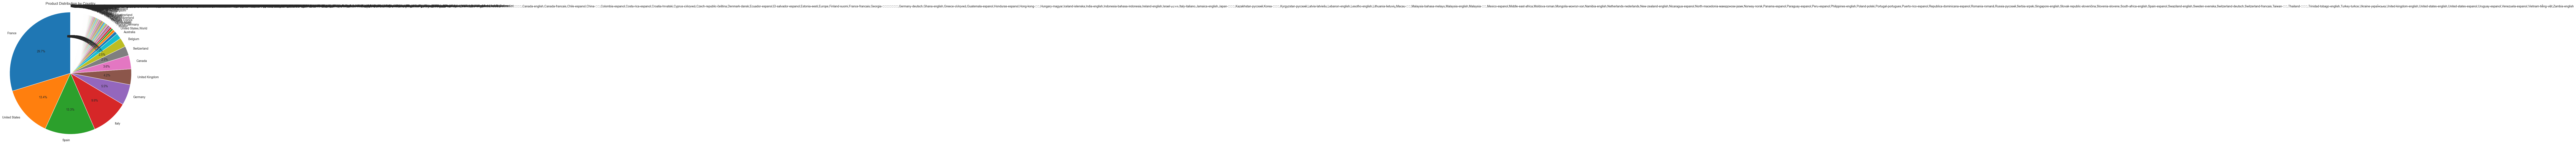

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("whitegrid")
plt.figure(figsize=(8, 8))
plt.pie(country_counts, labels=country_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Product Distribution by Country')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

55% of the products come from United States, Spain and France , there are good number of products that are from a mix of countries

Number of distinct products and brands 

In [49]:
product_counts = df_qualified['product_name'].value_counts()
total_count = df_qualified['product_name'].count()
product_percentages = (product_counts / total_count) * 100

In [48]:
product_counts

categories_en
Snacks,Sweet snacks,Biscuits and cakes,Biscuits                                                                                                                                           8946
Snacks,Sweet snacks,Confectioneries,Candies                                                                                                                                               6542
Plant-based foods and beverages,Plant-based foods,Fats,Vegetable fats,Olive tree products,Vegetable oils,Olive oils,Extra-virgin olive oils,Virgin olive oils                             6318
Dairies,Fermented foods,Fermented milk products,Cheeses                                                                                                                                   6315
Beverages                                                                                                                                                                                 5972
                               

In [50]:
product_percentages

product_name
Aceite de oliva virgen extra        0.083910
Mozzarella                          0.051056
Spaghetti                           0.049253
Chocolat                            0.046830
Panettone                           0.043674
                                      ...   
Crépinettes vin blanc et oignons    0.000056
Bigard tripe a la mode de caen      0.000056
Tripes à La Tomate 2x500g           0.000056
Bigard chair label rouge            0.000056
Light & Free SKYR A BOIRE           0.000056
Name: count, Length: 1140022, dtype: float64

Virgin Oil, Mozzarella and Spaghetti are the three common products

The most common Brands are as below

In [55]:
brands_counts = df_qualified['brands'].value_counts()

In [56]:
brands_counts

brands
Carrefour                   11995
Bonarea                     10862
Auchan                      10165
Hacendado                    7290
Lidl                         7262
                            ...  
Juste Pressé,Blue Phœnix        1
Pizza gondole                   1
Vin                             1
GAEC Cherel                     1
Eatrite                         1
Name: count, Length: 168233, dtype: int64

Carrefour, Bonarea and Auchan are the three top most brands

In [60]:
df_qualified.tail(2)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,ingredients_analysis_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutrition_data,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,nutrient_levels_tags,product_quantity,owner,data_quality_errors_tags,unique_scans_n,popularity_tags,completeness,last_image_t,last_image_datetime,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
3417649,9999999990397,http://world-en.openfoodfacts.org/product/9999...,kiliweb,1581171613,2020-02-08T14:20:13Z,1582644247,2020-02-25T15:24:07Z,fix-salt-bot,1.707643e+09,2024-02-11T09:21:41Z,Fati,NaN,NaN,440 g,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:be,en:belgium,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,unknown,unknown,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,unknown,NaN,440.0,NaN,NaN,1.0,"bottom-25-percent-scan

Average Nutrition Score for Top 10 Products

In [76]:
df_qualified['nutriscore_score'] = pd.to_numeric(df_qualified['nutriscore_score'], errors='coerce')

average_nutriscore = df_qualified.groupby('product_name')['nutriscore_score'].mean().reset_index()

average_nutriscore.columns = ['product_name', 'average_nutriscore_score']

average_nutriscore = average_nutriscore.sort_values(by='average_nutriscore_score', ascending=False)

print(average_nutriscore)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\4287680182.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualified['nutriscore_score'] = pd.to_numeric(df_qualified['nutriscore_score'], errors='coerce')


                                              product_name  \
1122167                        timothy's keurig chsi lstte   
43249                                        Anijsstaafjes   
175708   Chai Latte, Classic India Weniger Süss Typ Van...   
175683                                   Chai Latte K-Cups   
163019                       Caramel Cappucciono Drink Mix   
...                                                    ...   
1140017                                   🧀 steamed smoked   
1140018                                     🧀 tekov smoked   
1140019                                     🧀 with walnuts   
1140020                                 🧄 & limet dressing   
1140021                                                  🧈   

         average_nutriscore_score  
1122167                      40.0  
43249                        40.0  
175708                       40.0  
175683                       40.0  
163019                       40.0  
...                           ...  
114

Average Ecoscore for Top 10 Products

In [77]:
df_qualified['ecoscore_score'] = pd.to_numeric(df_qualified['ecoscore_score'], errors='coerce')

average_ecoscore = df_qualified.groupby('product_name')['ecoscore_score'].mean().reset_index()

average_ecoscore.columns = ['product_name', 'average_ecoscore_score']

average_ecoscore = average_ecoscore.sort_values(by='average_ecoscore_score', ascending=False)

print(average_ecoscore)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\3953646053.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualified['ecoscore_score'] = pd.to_numeric(df_qualified['ecoscore_score'], errors='coerce')


                                   product_name  average_ecoscore_score
992665                       Thé vert earl grey                   125.0
572198   MONOPRIX BIO Origines - INFUSION DETOX                   125.0
188025                         Chicorée liquide                   125.0
8760              24G 20ST INFUSION SOMMEIL MBP                   125.0
13576             50g infusion sommeil vrac mbp                   125.0
...                                         ...                     ...
1140014                        🧀 chilli volovec                     NaN
1140015                         🧀 garlic sticks                     NaN
1140017                        🧀 steamed smoked                     NaN
1140018                          🧀 tekov smoked                     NaN
1140021                                       🧈                     NaN

[1140022 rows x 2 columns]


Average Nutrition Score across Brands

In [79]:

average_brand_nutriscore = df_qualified.groupby('brands')['nutriscore_score'].mean().reset_index()

average_brand_nutriscore.columns = ['brands', 'average_brands_nutriscore']

average_brand_nutriscore = average_brand_nutriscore.sort_values(by='average_brands_nutriscore', ascending=False)

print(average_brand_nutriscore)

                      brands  average_brands_nutriscore
91146               Mr Beast                       37.0
140147     York Mantequerías                       36.0
27815       Contea Di modica                       36.0
31249                    DLR                       36.0
14635   Biscuiterie Albisser                       36.0
...                      ...                        ...
168224                    하림                        NaN
168225                 한성 기업                        NaN
168226                   한우물                        NaN
168228            （株）TENT-WO                        NaN
168229                  ＬＹＦＴ                        NaN

[168233 rows x 2 columns]


Average Ecosccore across Brands

In [80]:
average_brand_ecoscore = df_qualified.groupby('brands')['ecoscore_score'].mean().reset_index()

average_brand_ecoscore.columns = ['brands', 'average_brand_ecoscore']

average_brand_ecoscore = average_brand_ecoscore.sort_values(by='average_brand_ecoscore', ascending=False)

print(average_brand_ecoscore)

                                     brands  average_brand_ecoscore
160686                              symples                   125.0
90041   Monoprix Bio origines, Monoprix Bio                   125.0
90040                 Monoprix Bio origines                   125.0
140246                  Your organic nature                   125.0
75995                   Leroux,Avec plaisir                   125.0
...                                     ...                     ...
168228                           （株）TENT-WO                     NaN
168229                                 ＬＹＦＴ                     NaN
168230                                 𝐑𝐚𝐚𝐤                     NaN
168231                              𝘴𝘮𝘪𝘭𝘦𝘢𝘵                     NaN
168232                                  🤩🤩🤩                     NaN

[168233 rows x 2 columns]


Top 10 countries with High Sugar Consumption

In [81]:
df_qualified['sugars_100g'] = pd.to_numeric(df_qualified['sugars_100g'], errors='coerce')

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\264220415.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualified['sugars_100g'] = pd.to_numeric(df_qualified['sugars_100g'], errors='coerce')


In [119]:
total_sugar_by_country = df_qualified.groupby('countries_en')['sugars_100g'].mean().reset_index()
total_sugar_by_country = total_sugar_by_country.sort_values(by='sugars_100g', ascending=False)

In [120]:
total_sugar_by_country.columns = ['country', 'total_sugar_consumption_100g']

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\3962432994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sugar_consumption_100g', y='country', data=total_sugar_by_country.head(10), palette='viridis')


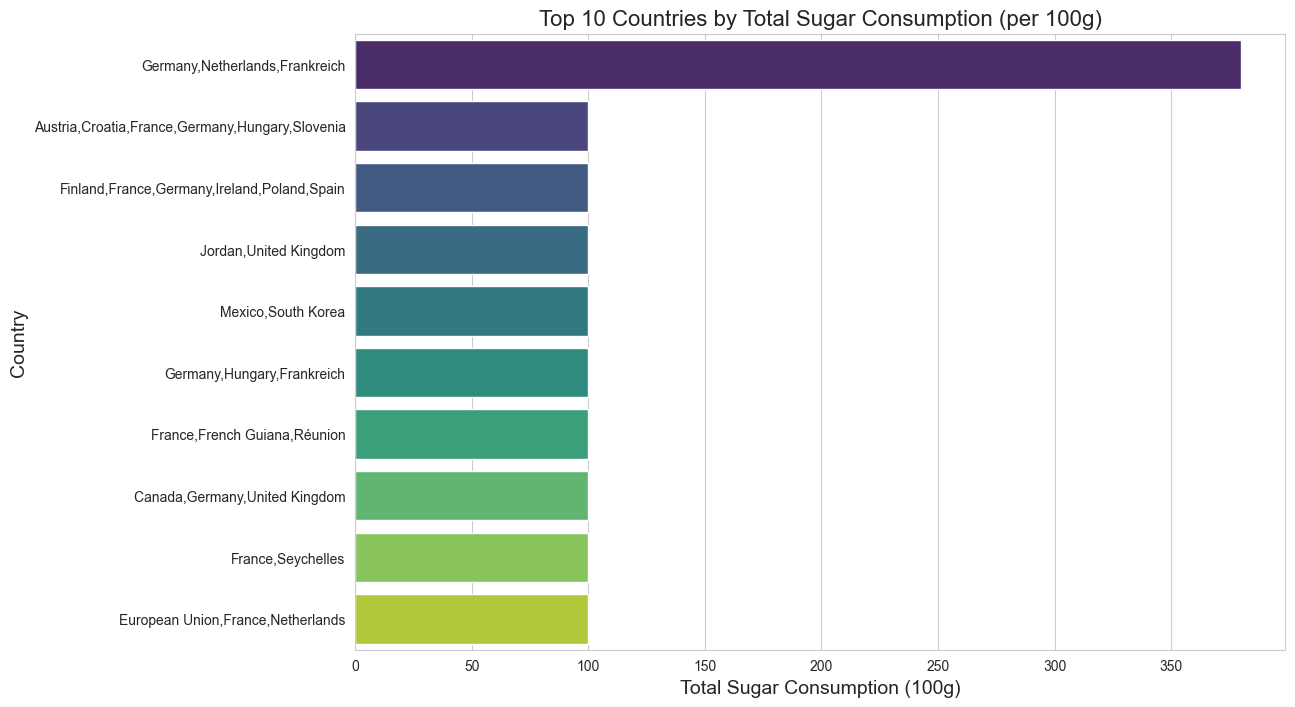

In [121]:
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sugar_consumption_100g', y='country', data=total_sugar_by_country.head(10), palette='viridis')
plt.title('Top 10 Countries by Total Sugar Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Sugar Consumption (100g)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

Top 10 countries that consume foods with high fat content

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\2787500253.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualified['fat_100g'] = pd.to_numeric(df_qualified['fat_100g'], errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\2787500253.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_fat_consumption_100g', y='country', data=total_fat_by_country.head(10), palette='viridis')


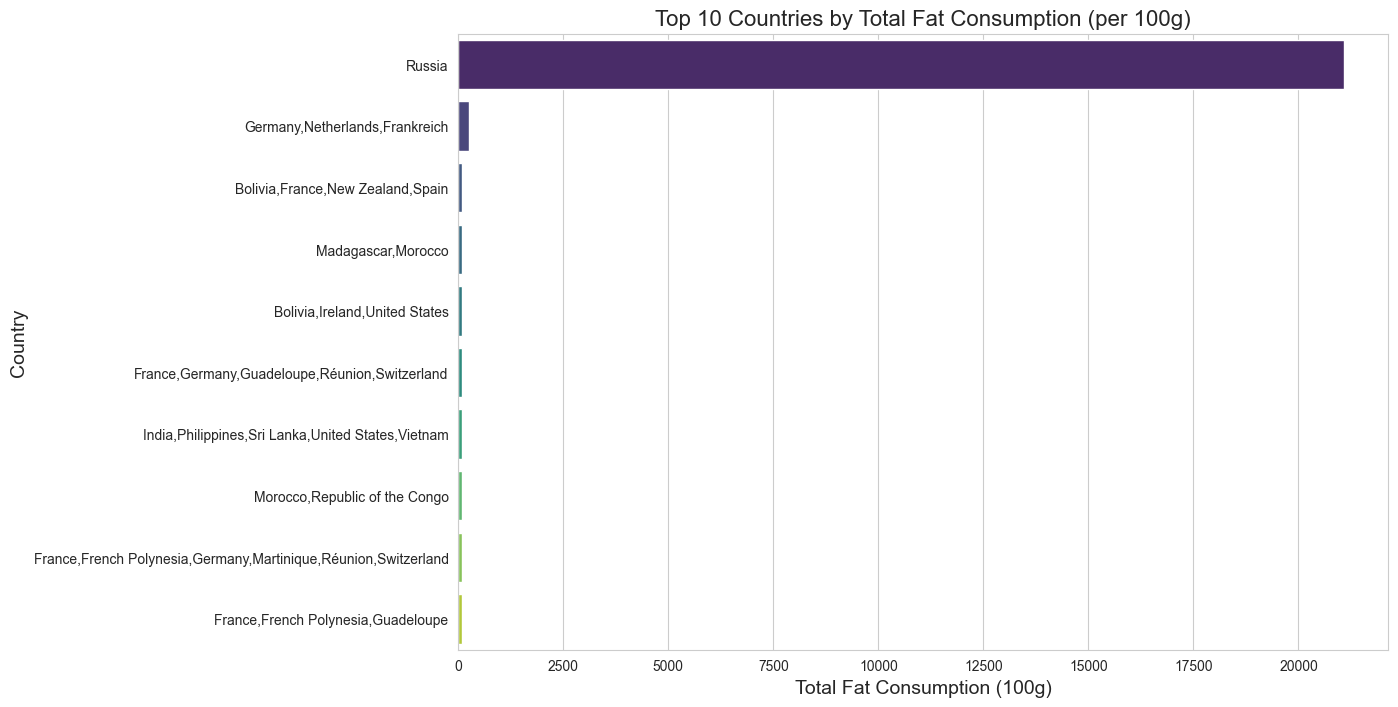

In [93]:
df_qualified['fat_100g'] = pd.to_numeric(df_qualified['fat_100g'], errors='coerce')
total_fat_by_country = df_qualified.groupby('countries_en')['fat_100g'].mean().reset_index()
total_fat_by_country = total_fat_by_country.sort_values(by='fat_100g', ascending=False)
total_fat_by_country.columns = ['country', 'total_fat_consumption_100g']
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_fat_consumption_100g', y='country', data=total_fat_by_country.head(10), palette='viridis')
plt.title('Top 10 Countries by Total Fat Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Fat Consumption (100g)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

Top 10 countries that consume foods with high salt content

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\2621652810.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_qualified['salt_100g'] = pd.to_numeric(df_qualified['salt_100g'], errors='coerce')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\2621652810.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_salt_consumption_100g', y='country', data=total_salt_by_country.head(10), palette='viridis')


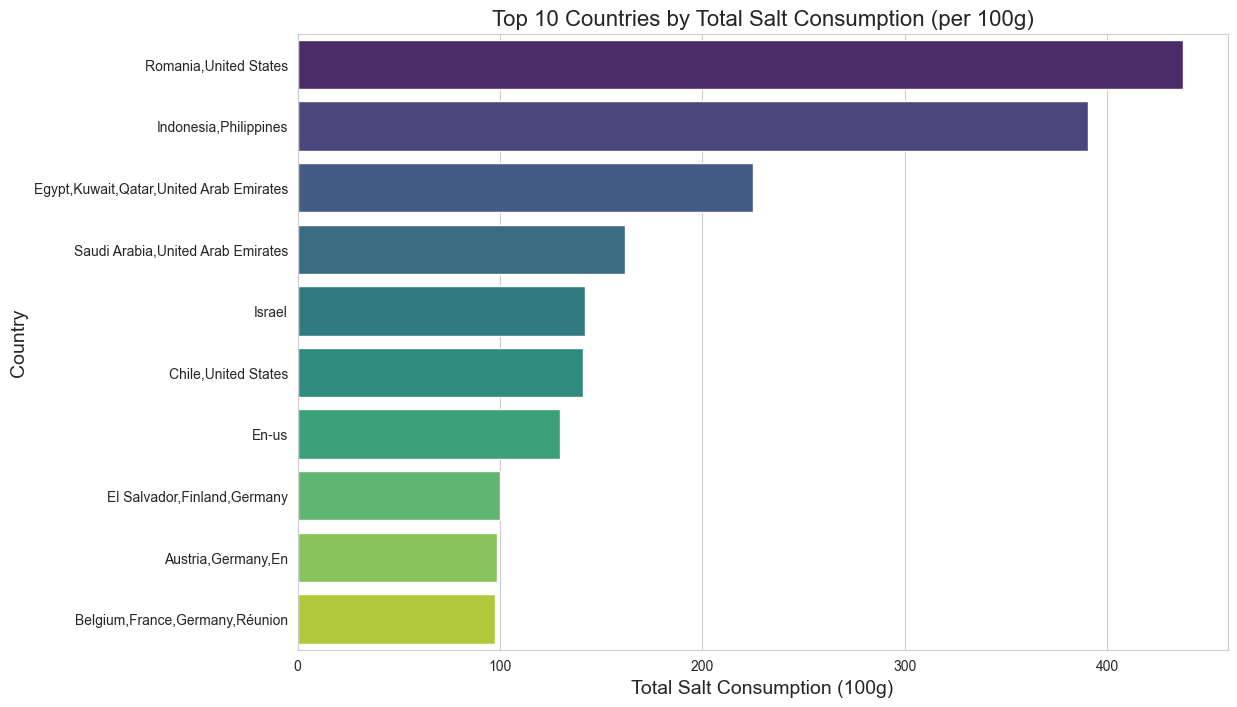

In [95]:
df_qualified['salt_100g'] = pd.to_numeric(df_qualified['salt_100g'], errors='coerce')
total_salt_by_country = df_qualified.groupby('countries_en')['salt_100g'].mean().reset_index()
total_salt_by_country = total_salt_by_country.sort_values(by='salt_100g', ascending=False)
total_salt_by_country.columns = ['country', 'total_salt_consumption_100g']
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_salt_consumption_100g', y='country', data=total_salt_by_country.head(10), palette='viridis')
plt.title('Top 10 Countries by Total Salt Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Salt Consumption (100g)', fontsize=14)
plt.ylabel('Country', fontsize=14)
plt.show()

Top 10 Brands with High Sugar Content

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\4068428910.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sugar_consumption_100g', y='brand', data=total_sugar_by_brand.head(10), palette='viridis')


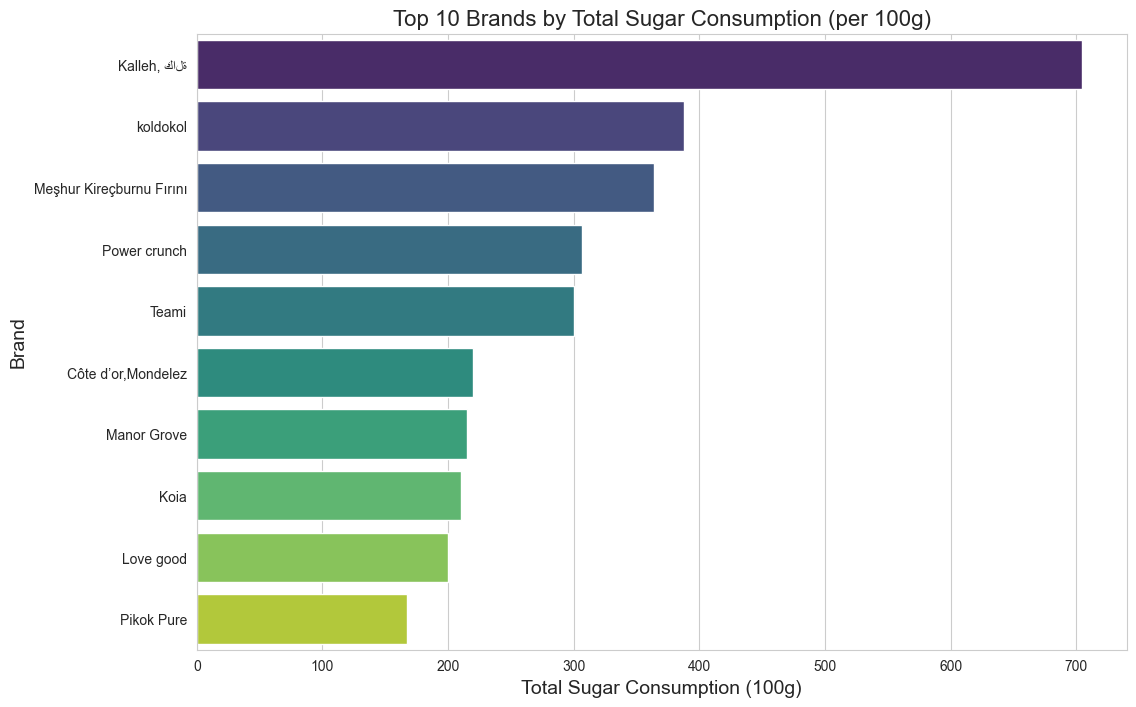

In [118]:
total_sugar_by_brand = df_qualified.groupby('brands')['sugars_100g'].mean().reset_index()
total_sugar_by_brand = total_sugar_by_brand.sort_values(by='sugars_100g', ascending=False)
total_sugar_by_brand.columns = ['brand', 'total_sugar_consumption_100g']
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sugar_consumption_100g', y='brand', data=total_sugar_by_brand.head(10), palette='viridis')
plt.title('Top 10 Brands by Total Sugar Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Sugar Consumption (100g)', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()

Top 10 Brands with high Average Salt Content

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\3563503106.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_salt_consumption_100g', y='brand', data=total_salt_by_brand.head(10), palette='viridis')


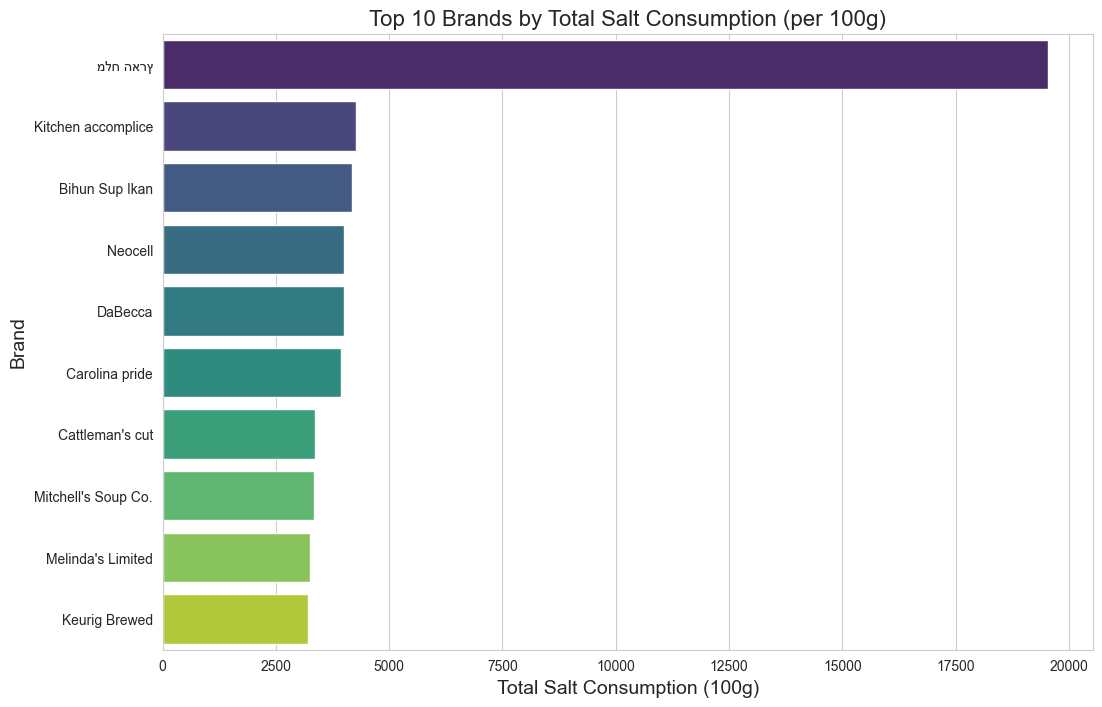

In [101]:
total_salt_by_brand = df_qualified.groupby('brands')['salt_100g'].mean().reset_index()
total_salt_by_brand = total_salt_by_brand.sort_values(by='salt_100g', ascending=False)
total_salt_by_brand.columns = ['brand', 'total_salt_consumption_100g']
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_salt_consumption_100g', y='brand', data=total_salt_by_brand.head(10), palette='viridis')
plt.title('Top 10 Brands by Total Salt Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Salt Consumption (100g)', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()

Top 10 Brands by High Average Fat Content

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\335344441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_fat_consumption_100g', y='brand', data=total_fat_by_brand.head(10), palette='viridis')


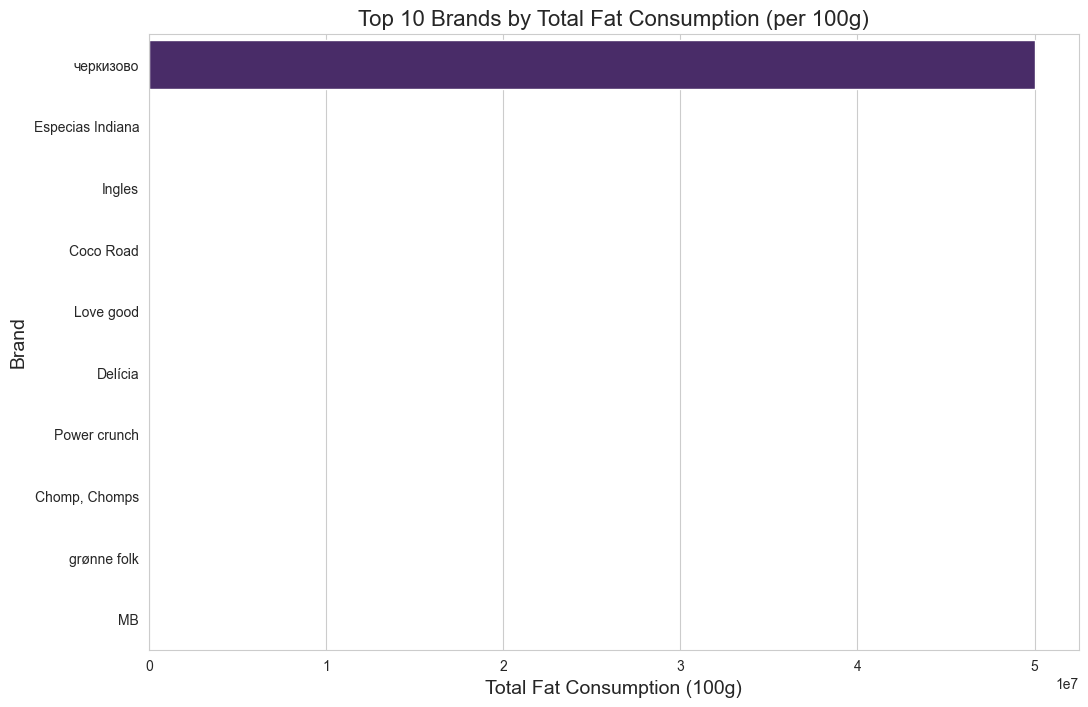

In [103]:
total_fat_by_brand = df_qualified.groupby('brands')['fat_100g'].mean().reset_index()
total_fat_by_brand = total_fat_by_brand.sort_values(by='fat_100g', ascending=False)
total_fat_by_brand.columns = ['brand', 'total_fat_consumption_100g']
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_fat_consumption_100g', y='brand', data=total_fat_by_brand.head(10), palette='viridis')
plt.title('Top 10 Brands by Total Fat Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Fat Consumption (100g)', fontsize=14)
plt.ylabel('Brand', fontsize=14)
plt.show()

Top 10 product names by High Sugar Content

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\10523897.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_sugar_consumption_100g', y='product_name', data=total_sugar_by_product.head(10), palette='viridis')


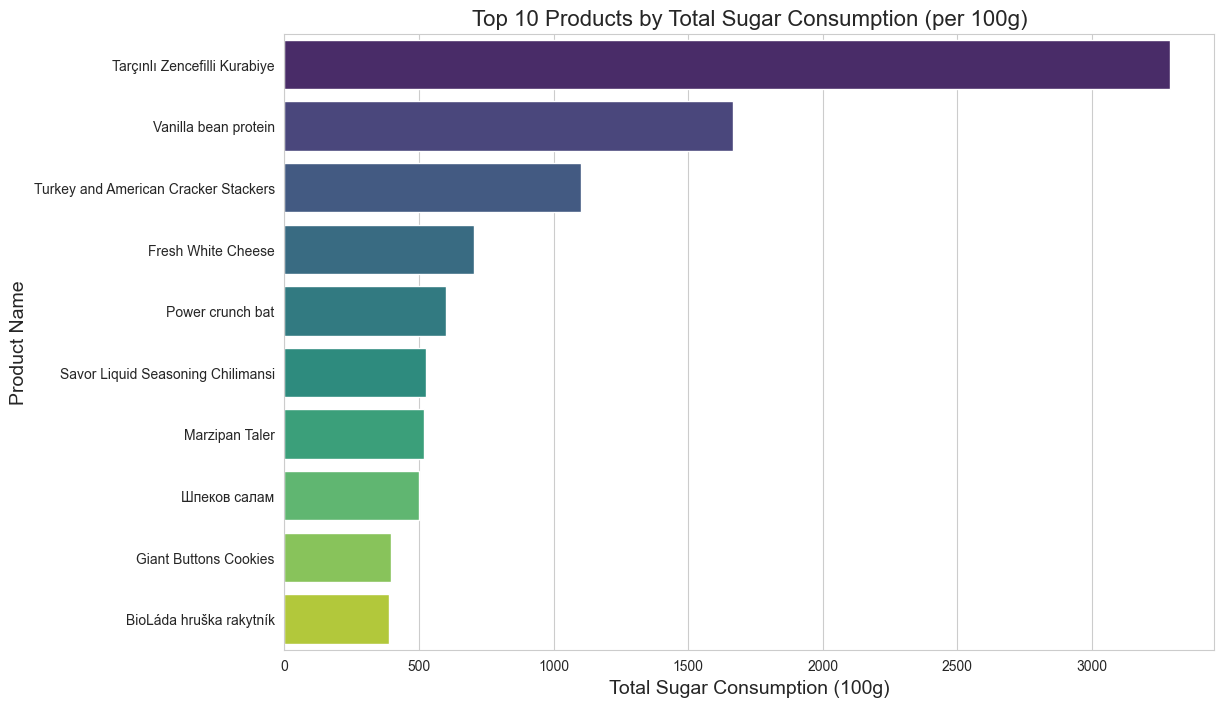

In [117]:
total_sugar_by_product = df_qualified.groupby('product_name')['sugars_100g'].mean().reset_index()
total_sugar_by_product = total_sugar_by_product.sort_values(by='sugars_100g', ascending=False)
total_sugar_by_product.columns = ['product_name', 'total_sugar_consumption_100g']
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_sugar_consumption_100g', y='product_name', data=total_sugar_by_product.head(10), palette='viridis')
plt.title('Top 10 Products by Total Sugar Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Sugar Consumption (100g)', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.show()

Top 10 products by high average salt content

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\41607289.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_salt_consumption_100g', y='product_name', data=total_salt_by_product.head(10), palette='viridis')


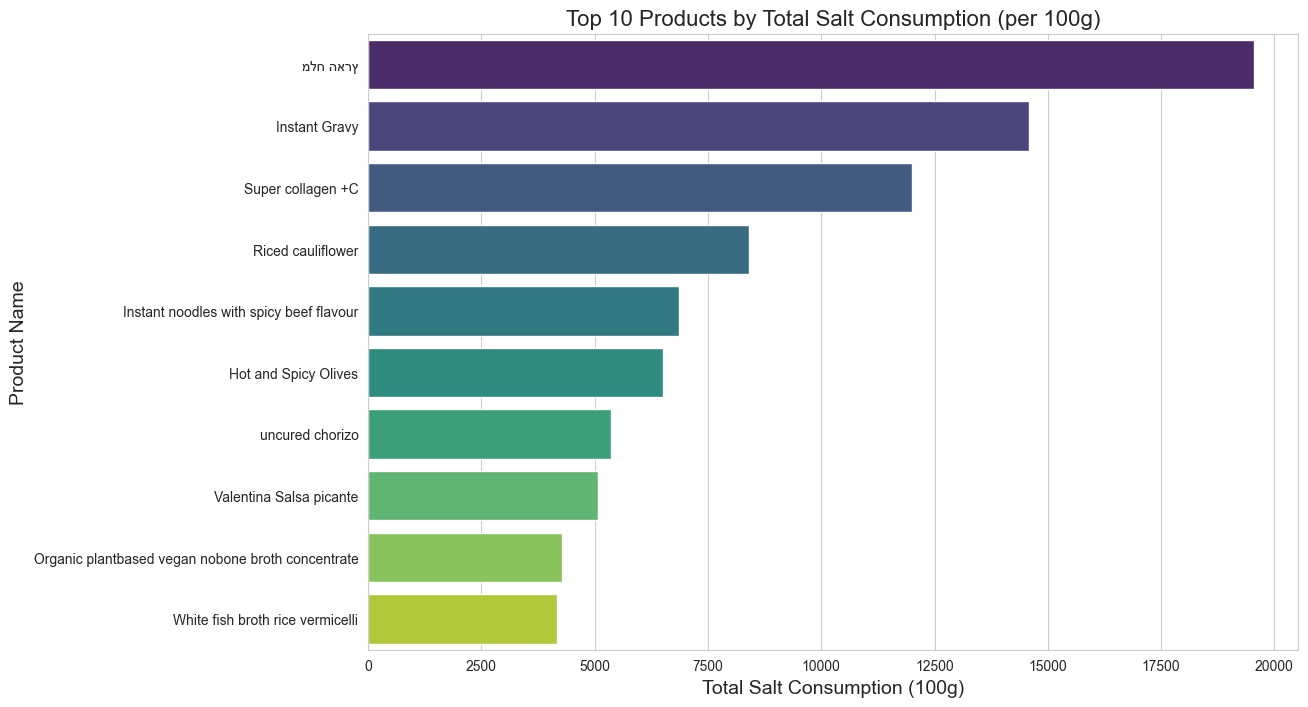

In [116]:
total_salt_by_product = df_qualified.groupby('product_name')['salt_100g'].mean().reset_index()
total_salt_by_product = total_salt_by_product.sort_values(by='salt_100g', ascending=False)
total_salt_by_product.columns = ['product_name', 'total_salt_consumption_100g']
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_salt_consumption_100g', y='product_name', data=total_salt_by_product.head(10), palette='viridis')
plt.title('Top 10 Products by Total Salt Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Salt Consumption (100g)', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.show()

Top 10 products by high fat content

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_12692\1691671746.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_fat_consumption_100g', y='product_name', data=total_fat_by_product.head(10), palette='viridis')


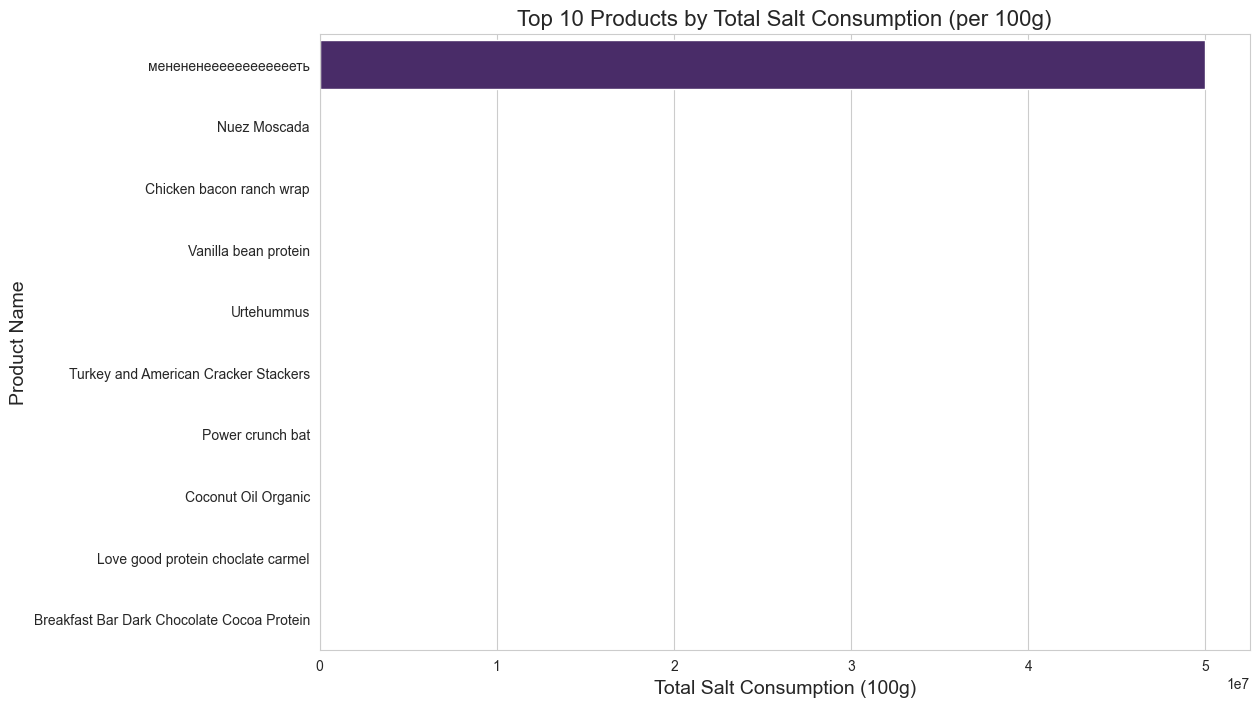

In [115]:
total_fat_by_product = df_qualified.groupby('product_name')['fat_100g'].mean().reset_index()
total_fat_by_product = total_fat_by_product.sort_values(by='fat_100g', ascending=False)
total_fat_by_product.columns = ['product_name', 'total_fat_consumption_100g']
# Plotting the bar graph
plt.figure(figsize=(12, 8))
sns.barplot(x='total_fat_consumption_100g', y='product_name', data=total_fat_by_product.head(10), palette='viridis')
plt.title('Top 10 Products by Total Salt Consumption (per 100g)', fontsize=16)
plt.xlabel('Total Salt Consumption (100g)', fontsize=14)
plt.ylabel('Product Name', fontsize=14)
plt.show()

In [124]:
df_qualified.tail(100)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,last_modified_by,last_updated_t,last_updated_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_en,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,ingredients_tags,ingredients_analysis_tags,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutrition_data,additives_n,additives,additives_tags,additives_en,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,food_groups,food_groups_tags,food_groups_en,states,states_tags,states_en,brand_owner,ecoscore_score,ecoscore_grade,nutrient_levels_tags,product_quantity,owner,data_quality_errors_tags,unique_scans_n,popularity_tags,completeness,last_image_t,last_image_datetime,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,butyric-acid_100g,caproic-acid_100g,caprylic-acid_100g,capric-acid_100g,lauric-acid_100g,myristic-acid_100g,palmitic-acid_100g,stearic-acid_100g,arachidic-acid_100g,behenic-acid_100g,lignoceric-acid_100g,cerotic-acid_100g,montanic-acid_100g,melissic-acid_100g,unsaturated-fat_100g,monounsaturated-fat_100g,omega-9-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,omega-6-fat_100g,alpha-linolenic-acid_100g,eicosapentaenoic-acid_100g,docosahexaenoic-acid_100g,linoleic-acid_100g,arachidonic-acid_100g,gamma-linolenic-acid_100g,dihomo-gamma-linolenic-acid_100g,oleic-acid_100g,elaidic-acid_100g,gondoic-acid_100g,mead-acid_100g,erucic-acid_100g,nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,added-sugars_100g,sucrose_100g,glucose_100g,fructose_100g,lactose_100g,maltose_100g,maltodextrins_100g,starch_100g,polyols_100g,erythritol_100g,fiber_100g,soluble-fiber_100g,insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,added-salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g,sulphate_100g,nitrate_100g,acidity_100g
3412140,9990683892485,http://world-en.openfoodfacts.org/product/9990...,kiliweb,1639156372,2021-12-10T17:12:52Z,1639156373,2021-12-10T17:12:53Z,kiliweb,1.707745e+09,2024-02-12T13:36:15Z,Chips à l'ancienne NATURE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:fr,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,NaN,unknown,unknown,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","To be completed,Nutrition facts completed,Ingr...",NaN,NaN,unknown,NaN,NaN,NaN,en:energy-value-in-kc